In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit.circuit.library import XGate, ZGate
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [2]:
def multi_cx(qc, controls, anti_controls, target):
    num_controls = len(controls) + len(anti_controls)
    ctrl_state = get_ctrl_state(controls, anti_controls)
    
    new_gate = XGate().control(num_controls, ctrl_state=ctrl_state)
    
    qc.append(new_gate, controls + anti_controls + [target])
    
    return qc

In [3]:
def multi_cz(qc, controls, anti_controls, target):
    num_controls = len(controls) + len(anti_controls)
    ctrl_state = get_ctrl_state(controls, anti_controls)
    new_gate = ZGate().control(num_controls, ctrl_state=ctrl_state)
    
    qc.append(new_gate, controls + anti_controls + [target])
    
    return qc

In [4]:
def get_ctrl_state(controls, anti_controls):
    # num_controls = len(controls) + len(anti_controls)
    ctrl_state = ''
    for i in range(num_qubits - 1, -1, -1):
        if i in controls:
            ctrl_state += '1'
        elif i in anti_controls:
            ctrl_state += '0'
    return ctrl_state

In [5]:
def szegedy_step(qc):
    multi_cx(qc, [2], [num_input + 1, num_input + 2], num_input + 0)
    multi_cx(qc, [2], [num_input + 2], num_input + 1)
    qc.cx(2, num_input + 2)

    multi_cx(qc, [1], [num_input + 1], num_input + 0)
    qc.cx(1, num_input + 1)

    qc.cx(0, num_input + 0)

    multi_cx(qc, [], [num_input + 0], num_input + 1)
    qc.h(num_input + 0)
    multi_cz(qc, [num_input + 0], [num_input + 1], num_input + 2)
    qc.h(num_input + 0)
    multi_cx(qc, [], [num_input + 0], num_input + 1)

    multi_cx(qc, [2, num_input + 1, num_input + 2], [], num_input + 0)
    multi_cx(qc, [2, num_input + 2], [], num_input + 1)
    qc.cx(2, num_input + 2)

    multi_cx(qc, [1, num_input + 1], [], num_input + 0)
    multi_cx(qc, [1], [], num_input + 1)
    qc.cx(0, num_input + 0)

    qc.swap(2, num_input + 2)
    qc.swap(1, num_input + 1)
    qc.swap(0, num_input + 0)
    
    # qc.draw(output="latex_source", filename="qcircuit.tex")
    qc.draw(output="mpl")

In [6]:
num_input = 3
num_qubits = num_input * 2

# Create the quantum circuit
qc = QuantumCircuit(num_input * 2, num_input * 2)

simulator = AerSimulator()

steps = 20
results = []

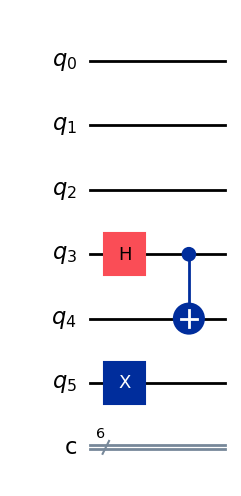

In [7]:
# Apply Hadamard coin operator
qc.h(num_input + 0)
qc.x(num_input + 2)
qc.cx(num_input + 0, num_input + 1)
# done with initail setup

qc.draw(output="latex_source", filename="initail_setup.tex")


qc.draw(output="mpl")